In [91]:
import pandas as pd
import numpy as np

In [92]:
df = pd.read_csv('c:\\Users\\user\\Desktop\\台大python\\專案\\archive\\calendar.csv')
df.head(20)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,3109,2023-09-05,f,$110.00,$110.00,2.0,30.0
1,3109,2023-09-06,f,$110.00,$110.00,2.0,30.0
2,3109,2023-09-07,f,$110.00,$110.00,2.0,30.0
3,3109,2023-09-08,t,$110.00,$110.00,2.0,30.0
4,3109,2023-09-09,t,$110.00,$110.00,2.0,30.0
5,3109,2023-09-10,t,$110.00,$110.00,2.0,30.0
6,3109,2023-09-11,f,$110.00,$110.00,2.0,30.0
7,3109,2023-09-12,f,$110.00,$110.00,2.0,30.0
8,3109,2023-09-13,f,$110.00,$110.00,2.0,30.0
9,3109,2023-09-14,f,$110.00,$110.00,2.0,30.0


In [93]:
print('columns',len(df.columns),'row',len(df.index))

columns 7 row 24798862


In [94]:
dfnona = df.dropna()
print('columns',len(dfnona.columns),'row',len(dfnona.index))

columns 7 row 24798837


In [95]:
dfnona['adjusted_price'].isna().sum()

0

In [119]:
emoji = pd.read_csv('c:\\Users\\user\\Desktop\\台大python\\專案\\archive\\reviews.csv')
emoji.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3109,123127969,2016-12-27,12389804,Sophie,The host canceled this reservation the day bef...
1,3109,123274144,2016-12-28,67553494,Tom'S,The host canceled this reservation 2 days befo...
2,3109,207127433,2017-10-28,51636494,Patricia,Tout s'est bien déroulé. Merci bien. PG
3,3109,208779822,2017-11-03,4142888,Patricia,Un petit nid fouiller douillet situé dans app...
4,3109,234257457,2018-02-12,3539452,Dominique,The host canceled this reservation 8 days befo...


In [147]:
# 確保 date 欄位是日期格式
emoji['date'] = pd.to_datetime(emoji['date'])

# 定義時間段
period_start = pd.to_datetime('2023-9-05')
period_end = pd.to_datetime('2024-09-06')

# 篩選時間段的資料
period_data = emoji[(emoji['date'] >= period_start) & (emoji['date'] <= period_end)]

In [148]:
print(period_data.shape)
period_data.head()

(78, 6)


,listing_id,id,date,reviewer_id,reviewer_name,comments
53850,691613,973826155075270148,2023-09-05,78714467,Jim,Very much enjoyed staying at Didier's apartmen...
110756,1249964,973721671914775550,2023-09-05,44810355,Sawyer,Mike’s place did not disappoint! I would stay ...
185637,2622407,973793693373539952,2023-09-05,30276398,Kirsten,Accueil cordial chez Eric et Rachel dans leur ...
218031,3389146,973741591979075514,2023-09-05,2371783,Sav,Absolutely a true gem in the best part of Pari...
261649,4525294,973711543819046179,2023-09-05,49578400,Casey,Jay’s place is the perfect base if you want to...


In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# 刪除中性和不相關的評論
drop_list = []
for rows in range(len(period_data["comments"])):
  if period_data['comments'].iloc[rows] == "Neutral" or period_data['comments'].iloc[rows] == "Irrelevant":
    drop_list.append(rows)
clean_train = period_data.drop(drop_list, axis = 0).reset_index()

print(clean_train.shape)

for i in range(len(clean_train)):
    text = clean_train['comments'].iloc[i]
    sid = SentimentIntensityAnalyzer()
    sentiment_scores = sid.polarity_scores(text)
    # 確認 text 是否正常
    # if i == 0:
    #     print(text)
    # 確認 sentiment_scores 是否正常
    # if i==0:
    #     print(sentiment_scores)
    clean_train.at[clean_train.index[i], 'compound'] = sentiment_scores['compound']
    clean_train.at[clean_train.index[i], 'pos'] = sentiment_scores['pos']
    clean_train.at[clean_train.index[i], 'neg'] = sentiment_scores['neg']
    clean_train.at[clean_train.index[i], 'neu'] = sentiment_scores['neu']

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


(78, 11)


In [155]:
clean_train.head(10)

,index,listing_id,id,date,reviewer_id,reviewer_name,comments,compound,pos,neg,neu
0,53850,691613,973826155075270148,2023-09-05,78714467,Jim,Very much enjoyed staying at Didier's apartmen...,0.9951,0.388,0.051,0.560
1,110756,1249964,973721671914775550,2023-09-05,44810355,Sawyer,Mike’s place did not disappoint! I would stay ...,0.9124,0.269,0.000,0.731
2,185637,2622407,973793693373539952,2023-09-05,30276398,Kirsten,Accueil cordial chez Eric et Rachel dans leur ...,-0.2003,0.000,0.040,0.960
3,218031,3389146,973741591979075514,2023-09-05,2371783,Sav,Absolutely a true gem in the best part of Pari...,0.9768,0.287,0.000,0.713
4,261649,4525294,973711543819046179,2023-09-05,49578400,Casey,Jay’s place is the perfect base if you want to...,0.8216,0.125,0.000,0.875
5,273232,4722636,973712935538826715,2023-09-05,149499763,Ashley,Sebastien’s flat was clean and conveniently lo...,0.8832,0.168,0.000,0.832
6,363701,7040925,973727046740562238,2023-09-05,89383805,Evelyn,Great location in Montmartre. The accommodatio...,0.7650,0.306,0.000,0.694
7,413694,8707396,973726607288100416,2023-09-05,36151907,Amy,Rene was a very gracious host. The apartment w...,0.9311,0.481,0.000,0.519
8,533711,13165246,973776730839388984,2023-09-05,385714093,Edith,Séjour super merci beaucoup à Hélène pour sa f...,0.6360,0.154,0.000,0.846
9,589257,14942621,973738911199843007,2023-09-05,250074552,Maria,Ya he repetido en varias ocasiones en casa de ...,0.0000,0.000,0.000,1.000


In [ ]:
# #確認 nltk 是否正常運作
# experiment_sentence = "I am not happy wiht this."
# sid = SentimentIntensityAnalyzer() # 初始化工具／幫他取短一點的名字
# score = sid.polarity_scores(experiment_sentence)
# score

{'neg': 0.428, 'neu': 0.572, 'pos': 0.0, 'compound': -0.4585}

In [97]:
listings = pd.read_csv('c:\\Users\\user\\Desktop\\台大python\\專案\\archive\\listings.csv')

In [98]:
listings[listings['id'] == 3109].head(20)
# calendar 中的 listing_id 是同一房型

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2,3109,https://www.airbnb.com/rooms/3109,20230904181324,2023-09-05,city scrape,Rental unit in Paris · ★5.0 · 1 bedroom · 1 be...,Lovely Appartment with one bedroom with a Quee...,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/baeae9e2-cd53...,3631,...,5.0,5.0,5.0,7511409139079,f,1,1,0,0,0.11


In [99]:
listings.shape[0]

67942

In [100]:
df[df['listing_id']==3109].head(10)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,3109,2023-09-05,f,$110.00,$110.00,2.0,30.0
1,3109,2023-09-06,f,$110.00,$110.00,2.0,30.0
2,3109,2023-09-07,f,$110.00,$110.00,2.0,30.0
3,3109,2023-09-08,t,$110.00,$110.00,2.0,30.0
4,3109,2023-09-09,t,$110.00,$110.00,2.0,30.0
5,3109,2023-09-10,t,$110.00,$110.00,2.0,30.0
6,3109,2023-09-11,f,$110.00,$110.00,2.0,30.0
7,3109,2023-09-12,f,$110.00,$110.00,2.0,30.0
8,3109,2023-09-13,f,$110.00,$110.00,2.0,30.0
9,3109,2023-09-14,f,$110.00,$110.00,2.0,30.0


In [118]:
# 確保 date 欄位是日期格式
dfnona['date'] = pd.to_datetime(dfnona['date'])

# 定義時間段
period1_start = pd.to_datetime('2023-9-05')
period1_end = pd.to_datetime('2024-06-30')
period2_start = pd.to_datetime('2024-07-01')
period2_end = pd.to_datetime('2024-09-06')

# 先移除 $ 符號和逗號，並轉成 float
dfnona['adjusted_price'] = dfnona['adjusted_price'].replace('[\$,]', '', regex=True).astype(float)
print(dfnona['adjusted_price'])

# 分別篩選兩個時間段的資料
period1_data = dfnona[(dfnona['date'] >= period1_start) & (dfnona['date'] <= period1_end)]
period2_data = dfnona[(dfnona['date'] >= period2_start) & (dfnona['date'] <= period2_end)]

# 計算每個 listing_id 在兩個時間段的平均價格
period1_avg = period1_data.groupby('listing_id')['adjusted_price'].mean().reset_index()
period1_avg.columns = ['listing_id', 'period1_avg_price']

period2_avg = period2_data.groupby('listing_id')['adjusted_price'].mean().reset_index()
period2_avg.columns = ['listing_id', 'period2_avg_price']

# 合併兩個時間段的結果
result = pd.merge(period1_avg, period2_avg, on='listing_id', how='outer')

# 計算差異 (第一期平均 - 第二期平均)
result['price_difference'] = result['period2_avg_price'] - result['period1_avg_price']

0           110.0
1           110.0
2           110.0
3           110.0
4           110.0
            ...  
24798832     85.0
24798833     85.0
24798834     85.0
24798835     85.0
24798836     85.0
Name: adjusted_price, Length: 24798837, dtype: float64


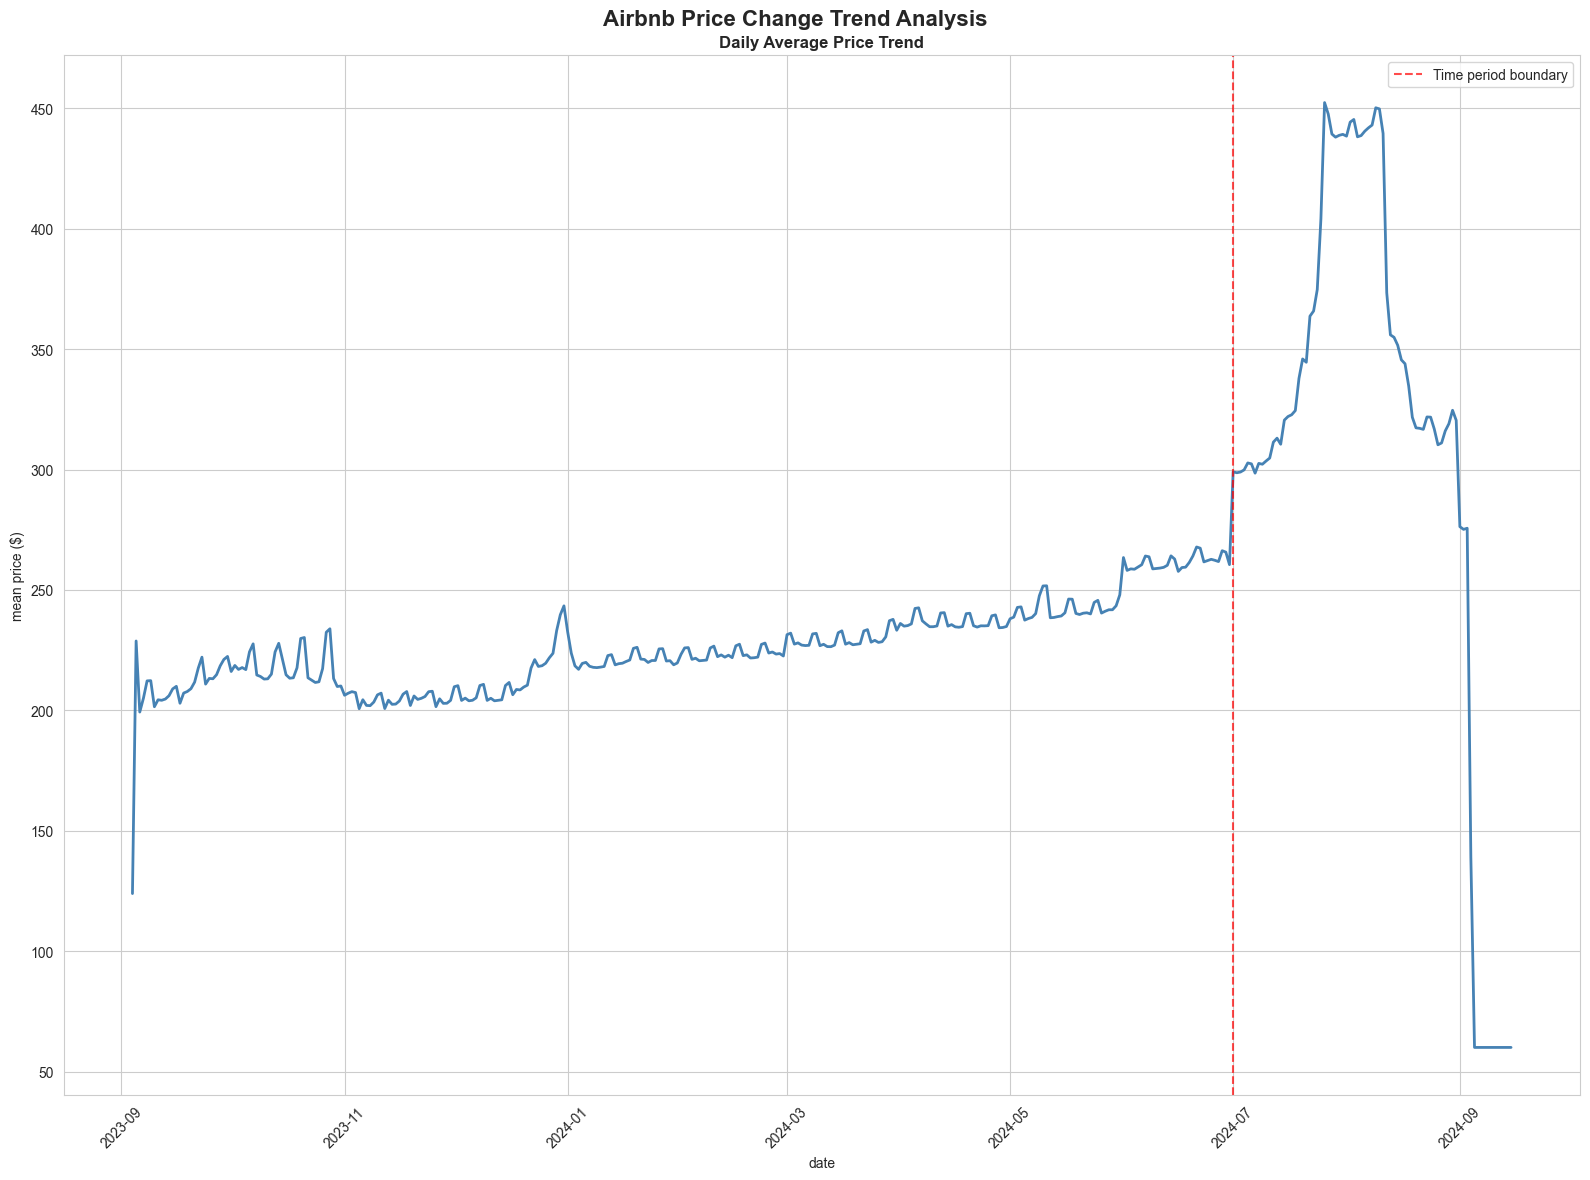

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 設定字體和圖表樣式
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")

# 創建圖表
fig, ax1 = plt.subplots(1, 1, figsize=(16, 12))
fig.suptitle('Airbnb Price Change Trend Analysis', fontsize=16, fontweight='bold')

# 每日平均價格趨勢
daily_avg = dfnona.groupby('date')['adjusted_price'].mean().reset_index()
ax1.plot(daily_avg['date'], daily_avg['adjusted_price'], linewidth=2, color='steelblue')
ax1.axvline(x=period2_start, color='red', linestyle='--', alpha=0.7, label='Time period boundary')
ax1.set_title('Daily Average Price Trend', fontsize=12, fontweight='bold')
ax1.set_xlabel('date')
ax1.set_ylabel('mean price ($)')
ax1.legend()
ax1.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



In [102]:
result.head(10)

,listing_id,period1_avg_price,period2_avg_price,price_difference
0,3109,110.000000,110.000000,0.000000
1,5396,149.694545,850.000000,700.305455
2,7397,145.963636,279.508197,133.544560
3,7964,180.000000,357.377049,177.377049
4,9359,75.000000,75.000000,0.000000
5,9952,190.000000,347.540984,157.540984
6,10586,80.000000,80.000000,0.000000
7,10588,75.000000,75.000000,0.000000
8,11265,145.000000,289.918033,144.918033
9,11487,64.436364,80.000000,15.563636


In [110]:
dfnona = pd.merge(dfnona,result, on='listing_id', how='left')

In [112]:
dfnona.head(10)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,period1_avg_price_x,period2_avg_price_x,price_difference_x,period1_avg_price_y,period2_avg_price_y,price_difference_y
0,3109,2023-09-05,f,$110.00,110.0,2.0,30.0,110.0,110.0,0.0,110.0,110.0,0.0
1,3109,2023-09-06,f,$110.00,110.0,2.0,30.0,110.0,110.0,0.0,110.0,110.0,0.0
2,3109,2023-09-07,f,$110.00,110.0,2.0,30.0,110.0,110.0,0.0,110.0,110.0,0.0
3,3109,2023-09-08,t,$110.00,110.0,2.0,30.0,110.0,110.0,0.0,110.0,110.0,0.0
4,3109,2023-09-09,t,$110.00,110.0,2.0,30.0,110.0,110.0,0.0,110.0,110.0,0.0
5,3109,2023-09-10,t,$110.00,110.0,2.0,30.0,110.0,110.0,0.0,110.0,110.0,0.0
6,3109,2023-09-11,f,$110.00,110.0,2.0,30.0,110.0,110.0,0.0,110.0,110.0,0.0
7,3109,2023-09-12,f,$110.00,110.0,2.0,30.0,110.0,110.0,0.0,110.0,110.0,0.0
8,3109,2023-09-13,f,$110.00,110.0,2.0,30.0,110.0,110.0,0.0,110.0,110.0,0.0
9,3109,2023-09-14,f,$110.00,110.0,2.0,30.0,110.0,110.0,0.0,110.0,110.0,0.0


In [105]:
df[df['listing_id']==5396].head(10)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
365,5396,2023-09-05,f,$150.00,$150.00,1.0,1125.0
366,5396,2023-09-06,f,$150.00,$150.00,1.0,1125.0
367,5396,2023-09-07,f,$119.00,$119.00,1.0,1125.0
368,5396,2023-09-08,f,$150.00,$150.00,1.0,1125.0
369,5396,2023-09-09,f,$150.00,$150.00,1.0,1125.0
370,5396,2023-09-10,f,$150.00,$150.00,1.0,1125.0
371,5396,2023-09-11,f,$114.00,$114.00,1.0,1125.0
372,5396,2023-09-12,f,$149.00,$149.00,1.0,1125.0
373,5396,2023-09-13,f,$149.00,$149.00,1.0,1125.0
374,5396,2023-09-14,f,$149.00,$149.00,1.0,1125.0


因為有一些房型沒有 2023-09-05 或 2024-09-06，造成前期和後期的數值落差

In [107]:
dfnona[dfnona['adjusted_price']==0].head(10)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,period1_avg_price,period2_avg_price,price_difference


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
import autosklearn.regression
import autosklearn.classification
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# 方案1: 聚合層級分析 - 比較奧運前後的整體趨勢
def aggregate_level_analysis(sentiment_df, price_df):
    """
    在聚合層級分析價格變化和情緒變化的關係
    """
    # 計算奧運前後的情緒統計
    sentiment_stats = sentiment_df.groupby('olympics_period')['sentiment_polarity'].agg([
        'mean', 'std', 'count', 'median'
    ]).reset_index()
    
    # 計算價格變化統計
    price_stats = {
        'avg_price_change': price_df['price_difference'].mean(),
        'median_price_change': price_df['price_difference'].median(),
        'std_price_change': price_df['price_difference'].std(),
        'positive_change_ratio': (price_df['price_difference'] > 0).mean(),
        'extreme_increase_ratio': (price_df['price_difference'] > 200).mean(),
        'no_change_ratio': (price_df['price_difference'] == 0).mean()
    }
    
    # 計算情緒變化
    before_sentiment = sentiment_stats[sentiment_stats['olympics_period'] == 'Before Olympics']['mean'].values[0]
    after_sentiment = sentiment_stats[sentiment_stats['olympics_period'] == 'After Olympics']['mean'].values[0]
    sentiment_change = after_sentiment - before_sentiment
    
    print("=== 聚合層級分析結果 ===")
    print(f"\n情緒變化: {sentiment_change:.4f}")
    print(f"平均價格變化: {price_stats['avg_price_change']:.2f}")
    print(f"漲價房源比例: {price_stats['positive_change_ratio']:.2%}")
    
    # 相關性檢驗
    correlation_result = {
        'sentiment_change': sentiment_change,
        'price_metrics': price_stats,
        'interpretation': interpret_correlation(sentiment_change, price_stats['avg_price_change'])
    }
    
    return correlation_result, sentiment_stats

# # 方案2: 時間序列分析 - 如果評論有時間戳
# def temporal_analysis(sentiment_df, price_df):
#     """
#     基於時間序列的分析（假設評論按時間排序）
#     """
#     # 為評論創建虛擬時間戳
#     sentiment_df['virtual_timestamp'] = pd.date_range(
#         start='2023-09-05', 
#         periods=len(sentiment_df), 
#         freq='H'
#     )
    
#     # 創建滑動窗口分析
#     window_size = 100  # 每100條評論為一個窗口
#     rolling_sentiment = []
    
#     for i in range(0, len(sentiment_df) - window_size, 50):
#         window = sentiment_df.iloc[i:i+window_size]
#         rolling_sentiment.append({
#             'window_id': i,
#             'mean_sentiment': window['sentiment_polarity'].mean(),
#             'period': window['olympics_period'].mode()[0],
#             'timestamp': window['virtual_timestamp'].mean()
#         })
    
#     rolling_df = pd.DataFrame(rolling_sentiment)
    
#     return rolling_df

# 方案3: 基於文本內容的價格關聯
def text_based_price_association(sentiment_df):
    """
    從評論文本中提取價格相關關鍵詞
    """
    # 價格相關關鍵詞
    price_keywords = {
        'expensive': ['expensive', 'costly', 'overpriced', 'rip off', 'too much'],
        'cheap': ['cheap', 'affordable', 'good value', 'reasonable', 'worth'],
        'price_increase': ['price increase', 'more expensive', 'raised prices', 'went up'],
        'price_decrease': ['discount', 'cheaper', 'reduced', 'lower price']
    }
    
    # 檢查每條評論是否包含價格相關詞彙
    sentiment_df['mentions_price'] = sentiment_df['translated_comment'].str.lower().str.contains(
        '|'.join([word for words in price_keywords.values() for word in words]),
        na=False
    )
    
    # 分類價格情緒
    def classify_price_sentiment(text):
        text_lower = text.lower() if isinstance(text, str) else ''
        if any(word in text_lower for word in price_keywords['expensive'] + price_keywords['price_increase']):
            return 'negative_price'
        elif any(word in text_lower for word in price_keywords['cheap'] + price_keywords['price_decrease']):
            return 'positive_price'
        else:
            return 'no_price_mention'
    
    sentiment_df['price_sentiment'] = sentiment_df['translated_comment'].apply(classify_price_sentiment)
    
    return sentiment_df

# 方案4: 統計模型 - 使用聚合特徵預測個別情緒
def statistical_model_approach(sentiment_df, price_df):
    """
    使用統計方法建立價格變化環境對情緒的影響模型
    """
    # 為每個時期創建價格環境特徵
    price_environment = {
        'Before Olympics': {
            'price_pressure': 0,  # 基準期
            'market_volatility': price_df['period1_avg'].std() / price_df['period1_avg'].mean(),
            'avg_nightly_rate': price_df['period1_avg'].mean()
        },
        'After Olympics': {
            'price_pressure': price_df['price_difference'].mean() / price_df['period1_avg'].mean(),  # 相對漲幅
            'market_volatility': price_df['period2_avg'].std() / price_df['period2_avg'].mean(),
            'avg_nightly_rate': price_df['period2_avg'].mean()
        }
    }
    
    # 為每條評論分配環境特徵
    X = []
    y = []
    
    for _, row in sentiment_df.iterrows():
        period = row['olympics_period']
        env = price_environment[period]
        
        features = [
            1 if period == 'After Olympics' else 0,  # 是否奧運後
            env['price_pressure'],  # 價格壓力指標
            env['market_volatility'],  # 市場波動性
            env['avg_nightly_rate'],  # 平均房價
            np.log1p(env['avg_nightly_rate'])  # 對數轉換的房價
        ]
        
        X.append(features)
        y.append(row['sentiment_polarity'])
    
    return np.array(X), np.array(y), price_environment

# 建立混合模型
def build_hybrid_model(sentiment_df, price_df):
    """
    結合多種方法的混合模型
    """
    print("=== 建立混合分析模型 ===\n")
    
    # 1. 聚合分析
    correlation_result, sentiment_stats = aggregate_level_analysis(sentiment_df, price_df)
    
    # 2. 文本分析
    sentiment_df = text_based_price_association(sentiment_df)
    
    # 3. 統計特徵
    X, y, price_environment = statistical_model_approach(sentiment_df, price_df)
    
    # 4. 添加文本特徵
    text_features = pd.get_dummies(sentiment_df['price_sentiment'], prefix='price_mention')
    X_combined = np.hstack([X, text_features.values])
    
    # 特徵名稱
    feature_names = [
        'is_after_olympics', 'price_pressure', 'market_volatility', 
        'avg_nightly_rate', 'log_nightly_rate'
    ] + list(text_features.columns)
    
    # 分割數據
    X_train, X_test, y_train, y_test = train_test_split(
        X_combined, y, test_size=0.2, random_state=42, 
        stratify=(y > 0.1).astype(int)  # 基於正面情緒分層
    )
    
    # 標準化
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # AutoML模型
    print("訓練AutoML模型...")
    automl = autosklearn.regression.AutoSklearnRegressor(
        time_left_for_this_task=300,
        per_run_time_limit=30,
        n_jobs=-1,
        memory_limit=3072,
        ensemble_size=50,
        ensemble_nbest=10,
        resampling_strategy='cv',
        resampling_strategy_arguments={'folds': 5}
    )
    
    automl.fit(X_train_scaled, y_train)
    
    # 評估
    y_pred = automl.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n模型評估結果：")
    print(f"MSE: {mse:.4f}")
    print(f"R2 Score: {r2:.4f}")
    
    # 特徵重要性分析（使用簡單模型）
    from sklearn.ensemble import RandomForestRegressor
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train_scaled, y_train)
    
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\n特徵重要性：")
    print(feature_importance)
    
    return automl, scaler, feature_names, sentiment_df, price_environment

# 視覺化分析
def comprehensive_visualization(sentiment_df, price_df):
    """
    全面的視覺化分析
    """
    fig, axes = plt.subplots(3, 2, figsize=(15, 15))
    
    # 1. 價格變化分布
    axes[0, 0].hist(price_df['price_difference'], bins=50, edgecolor='black', alpha=0.7)
    axes[0, 0].axvline(price_df['price_difference'].mean(), color='red', linestyle='--', label='平均值')
    axes[0, 0].set_title('Airbnb價格變化分布')
    axes[0, 0].set_xlabel('價格差異')
    axes[0, 0].legend()
    
    # 2. 情緒分布比較
    sentiment_df.boxplot(column='sentiment_polarity', by='olympics_period', ax=axes[0, 1])
    axes[0, 1].set_title('奧運前後情緒分布')
    
    # 3. 價格提及與情緒
    if 'price_sentiment' in sentiment_df.columns:
        price_mention_sentiment = sentiment_df.groupby(['olympics_period', 'price_sentiment'])['sentiment_polarity'].mean().unstack()
        price_mention_sentiment.plot(kind='bar', ax=axes[1, 0])
        axes[1, 0].set_title('價格提及類型與平均情緒')
        axes[1, 0].set_xlabel('時期')
        axes[1, 0].set_ylabel('平均情緒分數')
    
    # 4. 價格變化幅度分布
    price_change_categories = pd.cut(price_df['price_difference'], 
                                   bins=[-np.inf, 0, 50, 100, 200, np.inf],
                                   labels=['降價', '小幅上漲(0-50)', '中幅上漲(50-100)', 
                                          '大幅上漲(100-200)', '極大上漲(>200)'])
    price_change_categories.value_counts().plot(kind='pie', ax=axes[1, 1], autopct='%1.1f%%')
    axes[1, 1].set_title('價格變化類別分布')
    
    # 5. 情緒極性分布
    sentiment_categories = pd.cut(sentiment_df['sentiment_polarity'],
                                bins=[-1, -0.5, 0, 0.5, 1],
                                labels=['非常負面', '負面', '正面', '非常正面'])
    pd.crosstab(sentiment_df['olympics_period'], sentiment_categories).plot(kind='bar', ax=axes[2, 0])
    axes[2, 0].set_title('奧運前後情緒類別分布')
    axes[2, 0].set_xlabel('時期')
    axes[2, 0].set_ylabel('評論數量')
    
    # 6. 統計檢驗結果
    axes[2, 1].text(0.1, 0.8, '統計分析結果：', fontsize=14, weight='bold')
    
    # T檢驗
    before = sentiment_df[sentiment_df['olympics_period'] == 'Before Olympics']['sentiment_polarity']
    after = sentiment_df[sentiment_df['olympics_period'] == 'After Olympics']['sentiment_polarity']
    t_stat, p_value = stats.ttest_ind(before, after)
    
    axes[2, 1].text(0.1, 0.6, f'T檢驗 p-value: {p_value:.4f}', fontsize=12)
    axes[2, 1].text(0.1, 0.5, f'平均價格變化: {price_df["price_difference"].mean():.2f}', fontsize=12)
    axes[2, 1].text(0.1, 0.4, f'情緒變化: {after.mean() - before.mean():.4f}', fontsize=12)
    axes[2, 1].text(0.1, 0.3, f'漲價房源比例: {(price_df["price_difference"] > 0).mean():.2%}', fontsize=12)
    
    axes[2, 1].axis('off')
    
    plt.tight_layout()
    plt.show()

# 解釋函數
def interpret_correlation(sentiment_change, price_change):
    """
    解釋情緒變化和價格變化的關係
    """
    if sentiment_change < 0 and price_change > 0:
        return "價格上漲可能導致了負面情緒增加"
    elif sentiment_change > 0 and price_change > 0:
        return "雖然價格上漲，但情緒仍保持正面（可能因為奧運帶來的整體氛圍）"
    elif sentiment_change < 0 and price_change < 0:
        return "價格下降和負面情緒同時出現"
    else:
        return "價格和情緒變化關係複雜，需要更深入分析"

# 主程序
def main():
    """
    執行完整分析流程
    """
    print("=== 奧運對Airbnb價格和情緒影響分析 ===\n")
    
    # 載入數據
    sentiment_df = pd.read_csv('translated_sentiment_full.csv')
    price_df = result.copy()
    
    print(f"情緒數據: {len(sentiment_df)} 條評論")
    print(f"價格數據: {len(price_df)} 個房源\n")
    
    # 執行混合模型分析
    model, scaler, feature_names, enriched_sentiment_df, price_environment = build_hybrid_model(
        sentiment_df.copy(), price_df
    )
    
    # 視覺化
    print("\n生成視覺化分析...")
    comprehensive_visualization(enriched_sentiment_df, price_df)
    
    # 政策建議
    print("\n=== 分析洞察與建議 ===")
    print("1. 價格變化對情緒的影響需要考慮多個因素")
    print("2. 文本中的價格提及可以作為重要的補充信息")
    print("3. 整體市場環境（如奧運期間）會調節價格敏感度")
    print("4. 建議房東在大型活動期間謹慎定價，平衡收益和顧客滿意度")
    
    return model, scaler, enriched_sentiment_df, price_environment

# 預測函數
def predict_sentiment_with_context(model, scaler, feature_names, 
                                 is_after_olympics, price_pressure, 
                                 market_volatility, avg_rate, 
                                 mentions_expensive=False, mentions_cheap=False):
    """
    基於環境因素預測情緒
    """
    # 構建特徵向量
    features = [
        is_after_olympics,
        price_pressure,
        market_volatility,
        avg_rate,
        np.log1p(avg_rate),
        0,  # no_price_mention
        1 if mentions_expensive else 0,  # negative_price
        1 if mentions_cheap else 0  # positive_price
    ]
    
    features_array = np.array([features])
    features_scaled = scaler.transform(features_array)
    
    prediction = model.predict(features_scaled)[0]
    
    return prediction

if __name__ == "__main__":
    model, scaler, enriched_df, price_env = main()

In [ ]:
from sklearn.model_selection import train_test_split

X = result['price_difference'].values.reshape(-1, 1)
# print(X)
y = clean_train['compound'].values.reshape(-1, 1)
# print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

array([[110.],
       [110.],
       [110.],
       ...,
       [ 85.],
       [ 85.],
       [ 85.]])

In [1]:
%conda install -c conda-forge scikit-learn


Note: you may need to restart the kernel to use updated packages.



CondaSSLError: OpenSSL appears to be unavailable on this machine. OpenSSL is required to
download and install packages.

Exception: HTTPSConnectionPool(host='conda.anaconda.org', port=443): Max retries exceeded with url: /conda-forge/win-64/current_repodata.json (Caused by SSLError("Can't connect to HTTPS URL because the SSL module is not available."))




In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('c:\\Users\\user\\Desktop\\台大python\\專案\\translated_sentiment_full.csv')
df.head(20)

,comment,translated_comment,olympics_period,sentiment_polarity
0,nice cover,nice cover,Before Olympics,0.600000
1,Just rezone it already,Just rezone it already,Before Olympics,0.000000
2,"In the case of London, the biggest disincentiv...","In the case of London, the biggest disincentiv...",Before Olympics,0.087500
3,G-7 efforts to support the Fiat Dollar of West...,G-7 efforts to support the Fiat Dollar of West...,Before Olympics,0.121875
4,We need more of this thanks Bloomberg,We need more of this thanks Bloomberg,Before Olympics,0.350000
5,__ МНЕНИЕ __\n_КОЙ...,__ Opinion __\n_\n_ From as exists _\n_ The ch...,Before Olympics,0.000000
6,"""London is making hotels out its business dist...","""London is making hotels out its business dist...",Before Olympics,0.136364
7,the most ridiculous argument,the most ridiculous argument,Before Olympics,0.083333
8,Morning,Morning,Before Olympics,0.000000
9,Hi,Hi,Before Olympics,0.000000


In [3]:
df.shape

(34100, 4)

In [4]:
df[df['olympics_period']=='After Olympics'].shape

(17734, 4)